# 1.

In [8]:
import tensorflow as tf
import tensorflow.keras.backend as backend
import math

# CosineAnneling Example.
class CosineAnnealingLearningRateSchedule(tf.keras.callbacks.Callback):
    # constructor
    def __init__(self, n_epochs, n_cycles, lrate_max, min_lr, verbose = 0):
        self.epochs = n_epochs
        self.cycles=  n_cycles
        self.lr_max = lrate_max
        self.min_lr = min_lr
        self.lrates = list()
    
    # caculate learning rate for an epoch
    def cosine_annealing(self, epoch, n_epochs, n_cycles, lrate_max):
        # 전체 epoch / 설정 cycle 수만큼 cycle을 반복합니다.
        epochs_per_cycle = math.floor(n_epochs/n_cycles)
        cos_inner = (math.pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
        
        return lrate_max/2 * (math.cos(cos_inner) + 1)
  
    # calculate and set learning rate at the start of the epoch
    def on_epoch_begin(self, epoch, logs = None):
        if(epoch < 101):
            # calculate learning rate
            lr = self.cosine_annealing(epoch, self.epochs, self.cycles, self.lr_max)
            print('\nEpoch %05d: CosineAnnealingScheduler setting learng rate to %s.' % (epoch + 1, lr))
        # 101번째 epoch부터는 해당 설정한 min_lr을 사용
        else:
            lr = self.min_lr
            
        #     elif((epoch >= 65) and (epoch < 75)):
        #       lr = 1e-5
        #       print('\n No CosineAnnealingScheduler set lr 1e-5')
        #     elif((epoch >= 75) and (epoch < 85)):
        #       lr = 1e-6
        #       print('\n No CosineAnnealingScheduler set lr 1e-6')
        #     elif((epoch >= 85)):
        #       lr = 1e-7
        #       print('\n No CosineAnnealingScheduler set lr 1e-7')

        # set learning rate
        # 아래 예제 코드 실행을 위해선 밑 코드를 주석 처리 해주세요.
        backend.set_value(self.model.optimizer.lr, lr)
        # log value
        self.lrates.append(lr)


Epoch 00002: CosineAnnealingScheduler setting learng rate to 0.0009938441702975688.

Epoch 00003: CosineAnnealingScheduler setting learng rate to 0.0009755282581475768.

Epoch 00004: CosineAnnealingScheduler setting learng rate to 0.0009455032620941839.

Epoch 00005: CosineAnnealingScheduler setting learng rate to 0.0009045084971874737.

Epoch 00006: CosineAnnealingScheduler setting learng rate to 0.0008535533905932737.

Epoch 00007: CosineAnnealingScheduler setting learng rate to 0.0007938926261462366.

Epoch 00008: CosineAnnealingScheduler setting learng rate to 0.0007269952498697733.

Epoch 00009: CosineAnnealingScheduler setting learng rate to 0.0006545084971874737.

Epoch 00010: CosineAnnealingScheduler setting learng rate to 0.0005782172325201155.

Epoch 00011: CosineAnnealingScheduler setting learng rate to 0.0005.

Epoch 00012: CosineAnnealingScheduler setting learng rate to 0.0004217827674798847.

Epoch 00013: CosineAnnealingScheduler setting learng rate to 0.0003454915028125

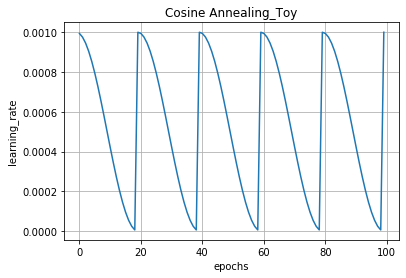

In [23]:
cosine_schedule = CosineAnnealingLearningRateSchedule(n_epochs = 100, n_cycles = 5, lrate_max = 1e-3, min_lr = 1e-6)

for i in range(1, 100 + 1):
    cosine_schedule.on_epoch_begin(i)
    
import matplotlib.pyplot as plt

plt.plot(cosine_schedule.lrates)
plt.title('Cosine Annealing_Toy')
plt.xlabel('epochs'); plt.ylabel('learning_rate')
plt.grid()
plt.show()

# 2.

In [ ]:
# T_max를 주기로 돌게 됩니다.
# 이때, T_mult는 제가 알기론 rewarmstarting을 위한 파라미터로서,
# 검색해보면 어느 블로그에서 이 parameter의 변화에 따른 성능변화를 정리한 글이 있습니다.

# 예를 들어서 T_max가 10이고, T_mult = 2이면,
# 첫 주기 10, 다음 주기 20, 그 다음주기 40
# 이런식으로 lr의 변화폭이 점점 줄어들게 됩니다.
# 위 코드보다 편리한점은 더 깔끔하고, lr_min(eta_min)을 적용할 수 있다는 점

class CosineAnnealingLearningRateSchedule(Callback):
    def __init__(self, n_epochs, init_lr, T_mult = 1, eta_min = 0,restart_decay = 0, verbose = 0):
        self.T_max = n_epochs
        self.T_mult = T_mult
        self.cycle_cnt = 0
        self.restart_decay = restart_decay
        self.init_lr = init_lr
        self.eta_min = eta_min
        self.lrates = list()
  # caculate learning rate for an epoch

    def cosine_annealing(self, epoch):
        lr = self.eta_min + (self.init_lr - self.eta_min) * (1 + math.cos(math.pi * (epoch / self.T_max))) / 2
        if(epoch == self.T_max):
            self.cycle_cnt += 1
            self.T_max = self.T_mult * self.T_max

        if(self.restart_decay >0):
            self.init_lr *= self.restart_decay
            print('change init learning rate {}'.format(self.init_lr))

    return lr
  # calculate and set learning rate at the start of the epoch

    def on_epoch_begin(self, epoch, logs = None):
        lr = self.cosine_annealing(epoch)
        print('\nEpoch %05d: CosineAnnealingScheduler setting learng rate to %s.' % (epoch + 1, lr))
        # set learning rate
        backend.set_value(self.model.optimizer.lr, lr)
        # log value
        self.lrates.append(lr)